<a href="https://colab.research.google.com/github/SuminBae97/MachineLearning/blob/master/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>필요 패키지 로딩</h1>

In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from fbprophet import Prophet
import  numpy as np

<h1>Prophet tutrial </h1>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving example_wp_log_peyton_manning.csv to example_wp_log_peyton_manning.csv


In [3]:
df = pd.read_csv("example_wp_log_peyton_manning.csv")

In [4]:
df.head(5)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:

df.tail(5)

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


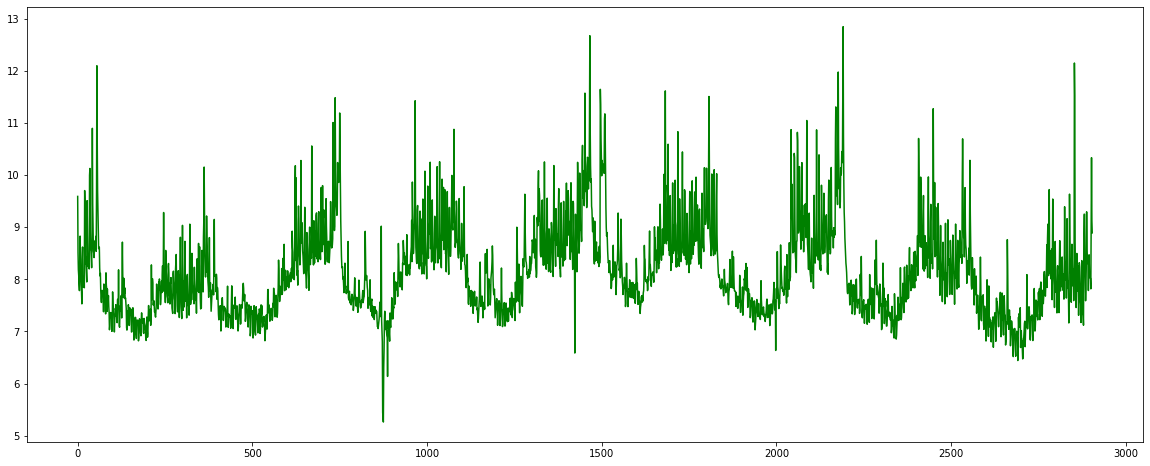

In [6]:
plt.figure(figsize=(20,8))
plt.plot(df['y'],color='green')

In [7]:
df.shape

(2905, 2)

<h1>Prophet model 호출</h1>

In [8]:
model = Prophet()

<h1>Pass historical data</h1>

In [9]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
help(model.predict)

Help on method predict in module fbprophet.forecaster:

predict(df=None) method of fbprophet.forecaster.Prophet instance
    Predict using the prophet model.
    
    Parameters
    ----------
    df: pd.DataFrame with dates for predictions (column ds), and capacity
        (column cap) if logistic growth. If not provided, predictions are
        made on the history.
    
    Returns
    -------
    A pd.DataFrame with the forecast components.



<h1>미래 날짜 data frame 제작 1년치</h>

In [11]:
future = model.make_future_dataframe(periods=365)

In [12]:
forecast = model.predict(future)

<h1>이전 기록을 포함을 할 수 있음</h1>

In [13]:
help(model.make_future_dataframe)

Help on method make_future_dataframe in module fbprophet.forecaster:

make_future_dataframe(periods, freq='D', include_history=True) method of fbprophet.forecaster.Prophet instance
    Simulate the trend using the extrapolated generative model.
    
    Parameters
    ----------
    periods: Int number of periods to forecast forward.
    freq: Any valid frequency for pd.date_range, such as 'D' or 'M'.
    include_history: Boolean to include the historical dates in the data
        frame for predictions.
    
    Returns
    -------
    pd.Dataframe that extends forward from the end of self.history for the
    requested number of periods.



In [14]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [15]:
help(model.plot)

Help on method plot in module fbprophet.forecaster:

plot(fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6)) method of fbprophet.forecaster.Prophet instance
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    
    Returns
    -------
    A matplotlib figure.



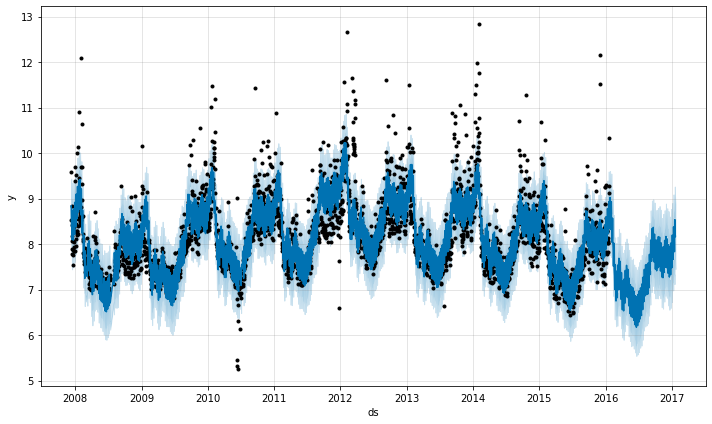

In [16]:
fig1 = model.plot(forecast)

In [17]:
forecast.shape

(3270, 19)

In [18]:
help(model.plot_components)

Help on method plot_components in module fbprophet.forecaster:

plot_components(fcst, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0, figsize=None) method of fbprophet.forecaster.Prophet instance
    Plot the Prophet forecast components.
    
    Will plot whichever are available of: trend, holidays, weekly
    seasonality, and yearly seasonality.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    weekly_start: Optional int specifying the start day of the weekly
        seasonality plot. 0 (default) starts the week on Sunday. 1 shifts
        by 1 day to Monday, and so on.
    yearly_start: Optional int specifying the start day of the yearly
        seasonality plot. 0 (default) starts the year on Jan 1. 1 shifts
        by 1 day to Jan 2, and so on.
    figsize

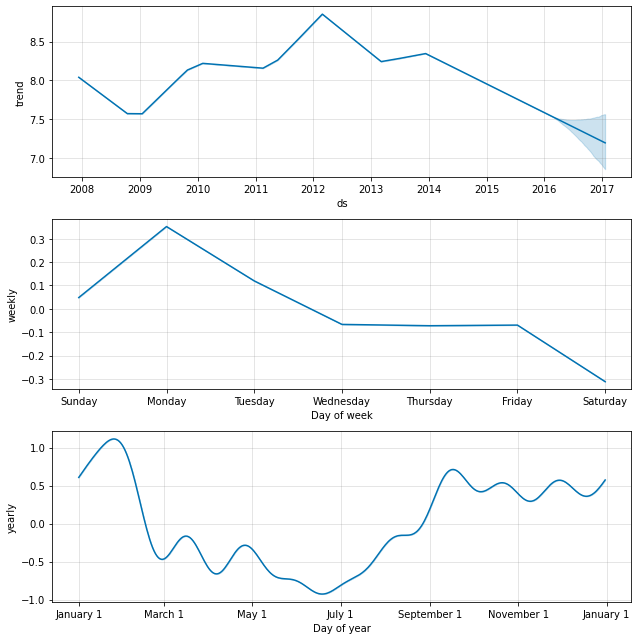

In [19]:
fig2 = model.plot_components(forecast)

<h1>기존 데이터 2007~2016</h1>

In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

<h1>upper lower는 예측의 범위</h1>

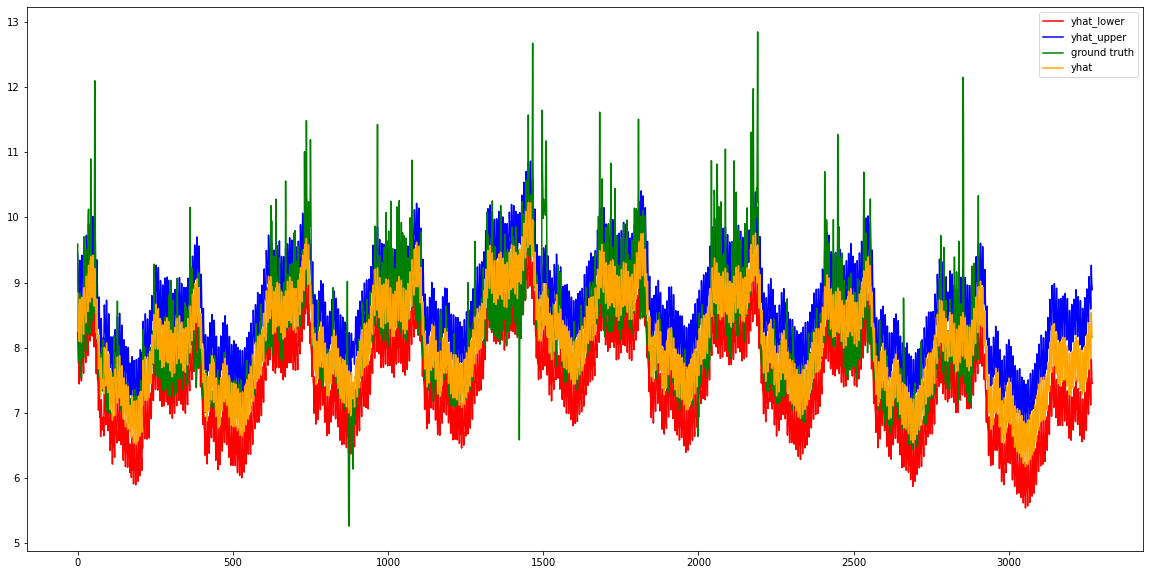

In [21]:
plt.figure(figsize=(20,10))
plt.plot(forecast['yhat_lower'],color='red',label='yhat_lower')
plt.plot(forecast['yhat_upper'],color='blue',label='yhat_upper')
plt.plot(df['y'],color='green',label='ground truth')
plt.plot(forecast['yhat'],color='orange',label='yhat')
plt.legend()

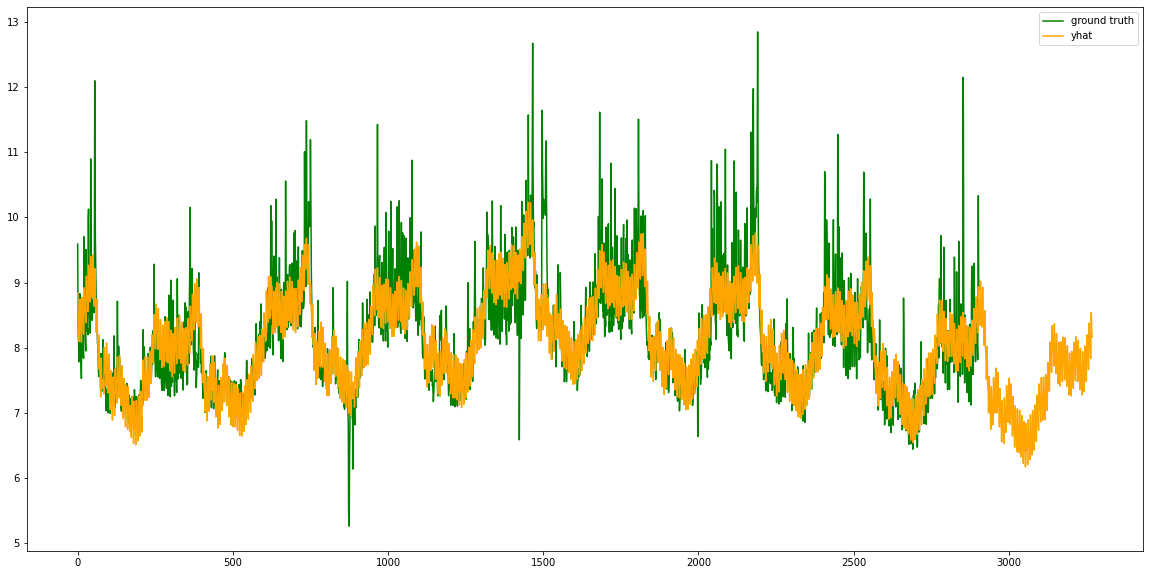

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df['y'],color='green',label='ground truth')
plt.plot(forecast['yhat'],color='orange',label='yhat')
plt.legend()

<h1>train validation으로 나눠서 학습</h1>

train : 2000개의 데이터로 추세 파악
validation : 600개의 데이터로 검증 

test : 300개의 데이터로 성능평가

In [23]:
df.shape

(2905, 2)

In [24]:
train_data = df.iloc[:2000]
validation_data = df.iloc[2000:2600]
test_data = df.iloc[2600:]

In [25]:
train_data.shape, test_data.shape, validation_data.shape

((2000, 2), (305, 2), (600, 2))

In [26]:
model2 = Prophet()
model2.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#forecast2 = model2.predict(test_data)

forecast2 = model2.predict(validation_data)

In [28]:
forecast2.shape

(600, 19)

In [29]:
forecast2.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [30]:
#test_data_index_reset = test_data.reset_index()

validation_data = validation_data.reset_index()

In [31]:
validation_data.head(5)

,index,ds,y
0,2000,2013-07-26,7.827640
1,2001,2013-07-27,7.633854
2,2002,2013-07-28,8.530307
3,2003,2013-07-29,8.529517
4,2004,2013-07-30,7.851272


In [32]:
validation_data.shape , forecast2.shape

((600, 3), (600, 19))

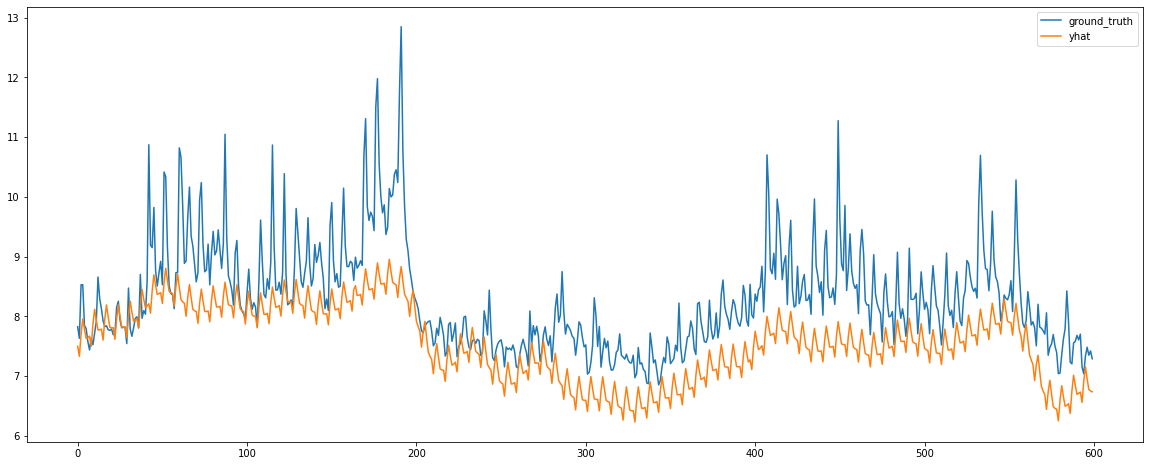

In [33]:
plt.figure(figsize=(20,8))
plt.plot(validation_data['y'],label='ground_truth')
plt.plot(forecast2['yhat'],label='yhat')
# plt.plot(forecast2['yhat_upper'],label='yhat_upper')
# plt.plot(forecast2['yhat_lower'],label='yhat_lower')
plt.legend()

<h1>MAPE 계산</h1>

In [34]:
def MAPE(y_test,y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [35]:
from sklearn.metrics import mean_squared_error 
#MSE = mean_squared_error(y_test, y_pred) 


In [36]:
MAPE(validation_data['y'],forecast2['yhat'])

8.731732351309745

In [37]:
from fbprophet.plot import add_changepoints_to_plot

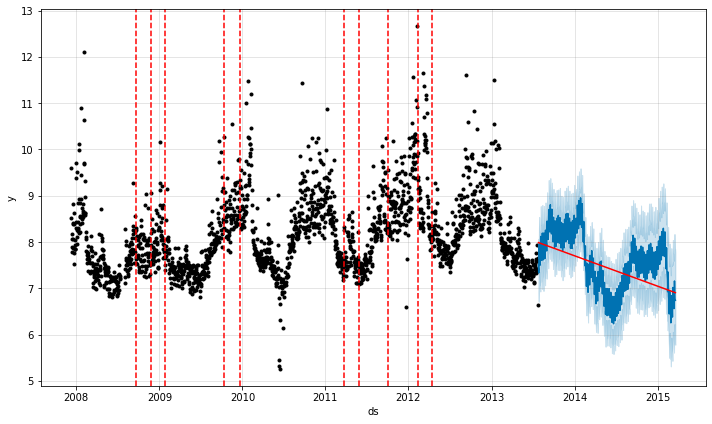

In [38]:
fig1 = model2.plot(forecast2)
a = add_changepoints_to_plot(fig1.gca(),model2,forecast2)

In [39]:
forecast2['ds'], validation_data['ds']

(0     2013-07-26
 1     2013-07-27
 2     2013-07-28
 3     2013-07-29
 4     2013-07-30
          ...    
 595   2015-03-16
 596   2015-03-17
 597   2015-03-18
 598   2015-03-19
 599   2015-03-20
 Name: ds, Length: 600, dtype: datetime64[ns], 0      2013-07-26
 1      2013-07-27
 2      2013-07-28
 3      2013-07-29
 4      2013-07-30
           ...    
 595    2015-03-16
 596    2015-03-17
 597    2015-03-18
 598    2015-03-19
 599    2015-03-20
 Name: ds, Length: 600, dtype: object)

**parameter searching**
changepoint_range = 0.9 (default 0.8)
changepoint_prior_scale = 0.1(default 0.05) 값을 늘리면 underfitting 해결, 값을 줄이면 overfitting 해결
** changepoint의 유연성을 조절**
- 데이터의 trend에 따라 유연성을 조정을 할 수 있다
- 유연성이 심한 경우(overfitting)
- 유연성이 충분하지 않은경우(underfitting)
- 값을 늘릴수록 트렌드가 유연해지며 underfit의 문제 해결?
- 값을 줄일수록 overfit의 문제 해결


In [40]:
model3 = Prophet(changepoint_range=0.9, changepoint_prior_scale=0.5)

In [41]:
model3 = Prophet(changepoint_range=0.9, changepoint_prior_scale=0.001)
model3.fit(train_data)
forecast3 = model3.predict(validation_data)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


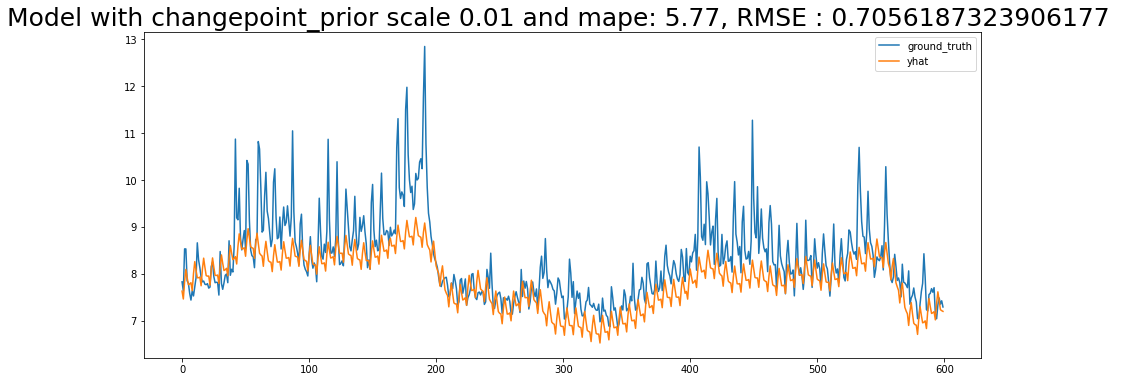

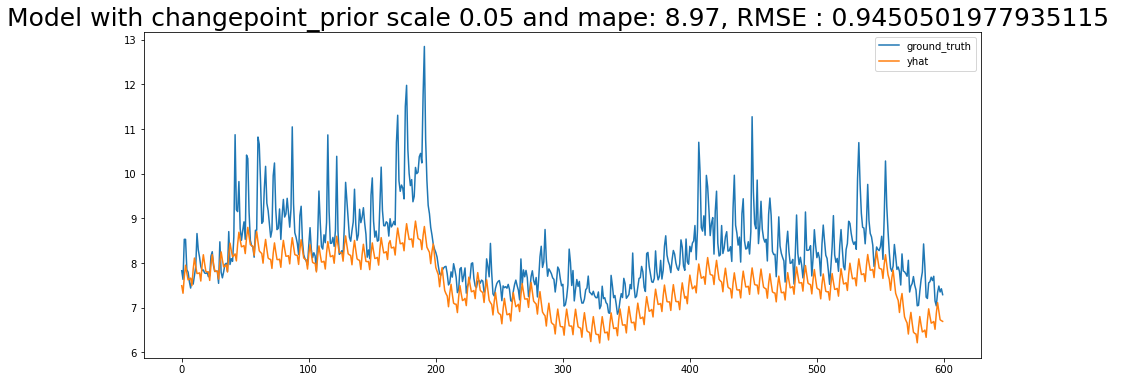

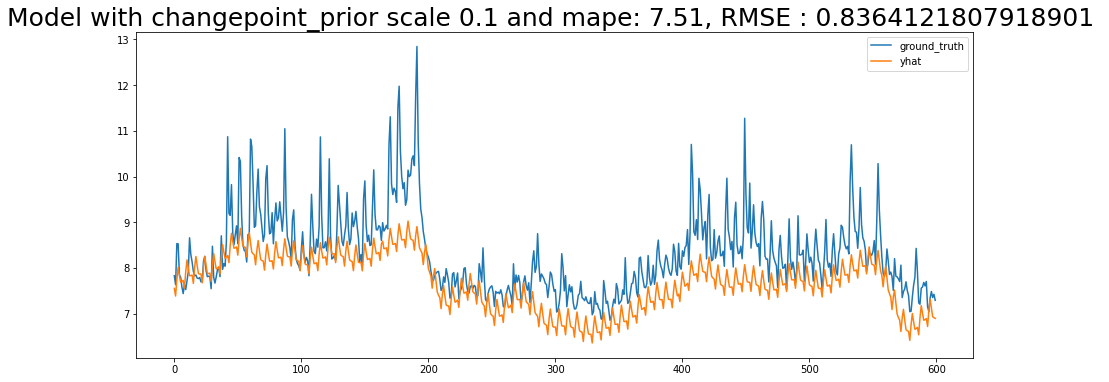

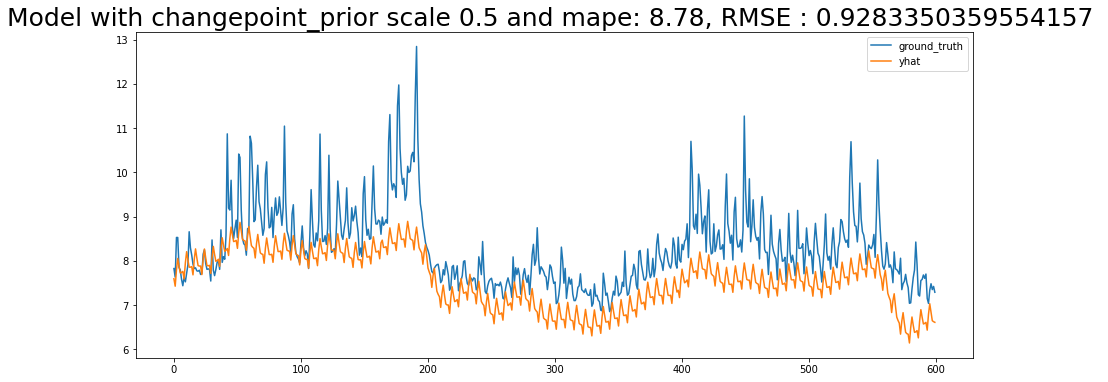

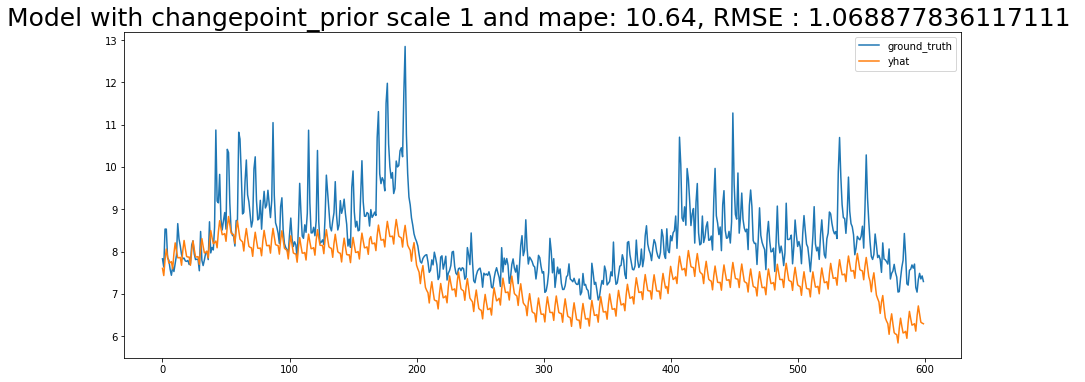

In [42]:
changepoint_prior_scale=[0.01,0.05,0.1,0.5,1]

for cps in changepoint_prior_scale:
    model = Prophet(changepoint_range=0.9, changepoint_prior_scale=cps)
    model.fit(train_data)
    forecast = model.predict(validation_data)
    plt.figure(figsize=(15,6))
    mape = MAPE(validation_data['y'],forecast['yhat'])
    mse = mean_squared_error(validation_data['y'], forecast['yhat']) 
    plt.title("Model with changepoint_prior scale {} and mape: {}, RMSE : {} ".format(cps,round(mape,2),np.sqrt(mse)),fontsize=25)
    plt.plot(validation_data['y'],label='ground_truth')
    plt.plot(forecast['yhat'],label='yhat')
    plt.legend()



Yearly_seasonality parameter 조절
- 만약 시즈널리티가 자주 발생한다고 생각되면 이값을 20으로 수정?

In [62]:
model4 = Prophet(changepoint_range=0.7, changepoint_prior_scale=0.01,yearly_seasonality=20)
model4.fit(train_data)
forecast4 = model4.predict(validation_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.48313880134974
0.5639543150555064


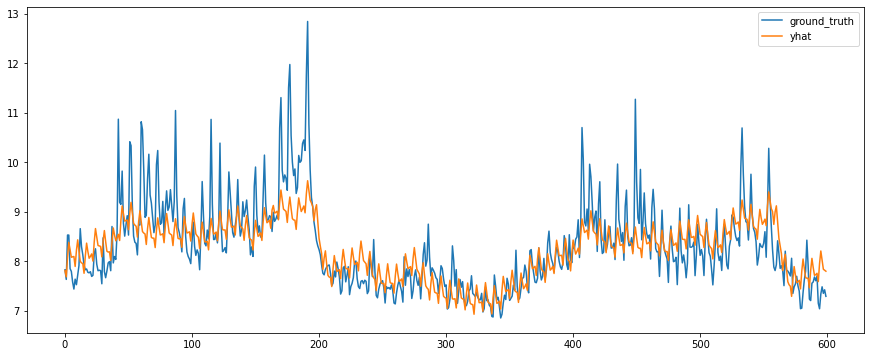

In [63]:
plt.figure(figsize=(15,6))
mape = MAPE(validation_data['y'],forecast4['yhat'])
print(mape)
mse = mean_squared_error(validation_data['y'], forecast4['yhat'])
print(np.sqrt(mse)) 
plt.plot(validation_data['y'],label='ground_truth')
plt.plot(forecast4['yhat'],label='yhat')
plt.legend()

Tutorial상 cross validation 방법 소개